# 주식:장기 채권 변동성 역가중 포트폴리오  p155
 - 투자자산 : 코스피200, 10년만기국채, 20년만기국채
 - 매수원칙 : 최근 12개월간의 주식과 채권의 변동성 역가중에 따른 매수
 - 매도원칙 : 매월말 리밸런싱

그림 2-20

In [1]:
from settings import *

In [2]:
tickers = ['kodex200', 'kbond10y', 'kbond20y']
read_df = get_data()
read_df = read_df[tickers]
read_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5433 entries, 2000-01-04 to 2021-12-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5433 non-null   float64
 1   kbond10y  5433 non-null   float64
 2   kbond20y  5433 non-null   float64
dtypes: float64(3)
memory usage: 169.8 KB


In [3]:
data = read_df['2001':].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5192 entries, 2001-01-02 to 2021-12-30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   kodex200  5192 non-null   float64
 1   kbond10y  5192 non-null   float64
 2   kbond20y  5192 non-null   float64
dtypes: float64(3)
memory usage: 162.2 KB


In [4]:
start = '2002-2-27'

In [5]:
주식채권혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)

In [6]:
변동성역가중 = bt.Strategy('변동성역가중',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighInvVol(lookback=pd.DateOffset(years=1), lag=pd.DateOffset(days=1)),
        bt.algos.PrintTempData(),
        bt.algos.Rebalance()

    ])

In [7]:
bt_kodex200 = long_only_ew(data, ['kodex200'], 'kodex200', initial_capital=100000000)
bt_kbond10y = long_only_ew(data, ['kbond10y'], 'kbond10y', initial_capital=100000000)
bt_kbond20y = long_only_ew(data, ['kbond20y'], 'kbond20y', initial_capital=100000000)

In [8]:
bt_test10 = bt.Backtest(주식채권혼합전략, data[['kodex200', 'kbond10y']], name='1:1(10년국채)', initial_capital=100000000)
bt_test20 = bt.Backtest(주식채권혼합전략, data[['kodex200', 'kbond20y']], name='1:1(20년국채)', initial_capital=100000000)


In [9]:
bt_invvol10 = bt.Backtest(변동성역가중, data[['kodex200', 'kbond10y']], name='10년국채(변동성역가중)', initial_capital=100000000)
bt_invvol20 = bt.Backtest(변동성역가중, data[['kodex200', 'kbond20y']], name='20년국채(변동성역가중)', initial_capital=100000000)


In [10]:
r10 = bt.run(bt_invvol10)
r20 = bt.run(bt_invvol20)
r20_assets = bt.run(bt_kodex200)
r_all = bt.run(bt_kodex200, bt_invvol10, bt_invvol20)

2002-02-28 00:00:00
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.285
kbond10y   0.715
dtype: float64}
2002-03-29 00:00:00
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.258
kbond10y   0.742
dtype: float64}
2002-04-30 00:00:00
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.252
kbond10y   0.748
dtype: float64}
2002-05-31 00:00:00
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.241
kbond10y   0.759
dtype: float64}
2002-06-28 00:00:00
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.242
kbond10y   0.758
dtype: float64}
2002-07-31 00:00:00
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.196
kbond10y   0.804
dtype: float64}
2002-08-30 00:00:00
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.187
kbond10y   0.813
dtype: float64}
2002-09-30 00:00:00
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.187
kbond10y   0.813
dtype: float64}
2002-10-31 00:00:00
{'selected': ['kodex

In [11]:

# %%
# r20.backtests['1:1:1(20년국채)'].stats.display()

In [12]:
r_all.set_date_range(start)
r_all.display()

Stat                 kodex200    10년국채(변동성역가중)    20년국채(변동성역가중)
-------------------  ----------  ------------------------  ------------------------
Start                2002-02-27  2002-02-27                2002-02-27
End                  2021-12-30  2021-12-30                2021-12-30
Risk-free rate       0.00%       0.00%                     0.00%

Total Return         448.85%     235.02%                   471.74%
Daily Sharpe         0.51        1.03                      0.93
Daily Sortino        0.81        1.68                      1.51
CAGR                 8.96%       6.28%                     9.19%
Max Drawdown         -52.67%     -13.72%                   -22.82%
Calmar Ratio         0.17        0.46                      0.40

MTD                  6.52%       1.17%                     1.98%
3m                   -0.81%      0.29%                     0.18%
6m                   -9.05%      -1.89%                    -3.61%
YTD                  2.77%       -1.68%                   

In [13]:
r_all.prices.resample('M').last().to_drawdown_series().describe()

,kodex200,10년국채(변동성역가중),20년국채(변동성역가중)
count,239.000,239.000,239.000
mean,-0.100,-0.010,-0.018
std,0.093,0.017,0.029
min,-0.455,-0.111,-0.188
25%,-0.146,-0.012,-0.024
50%,-0.085,-0.002,-0.005
75%,-0.024,0.000,0.000
max,0.000,0.000,0.000


## 그림 2.20

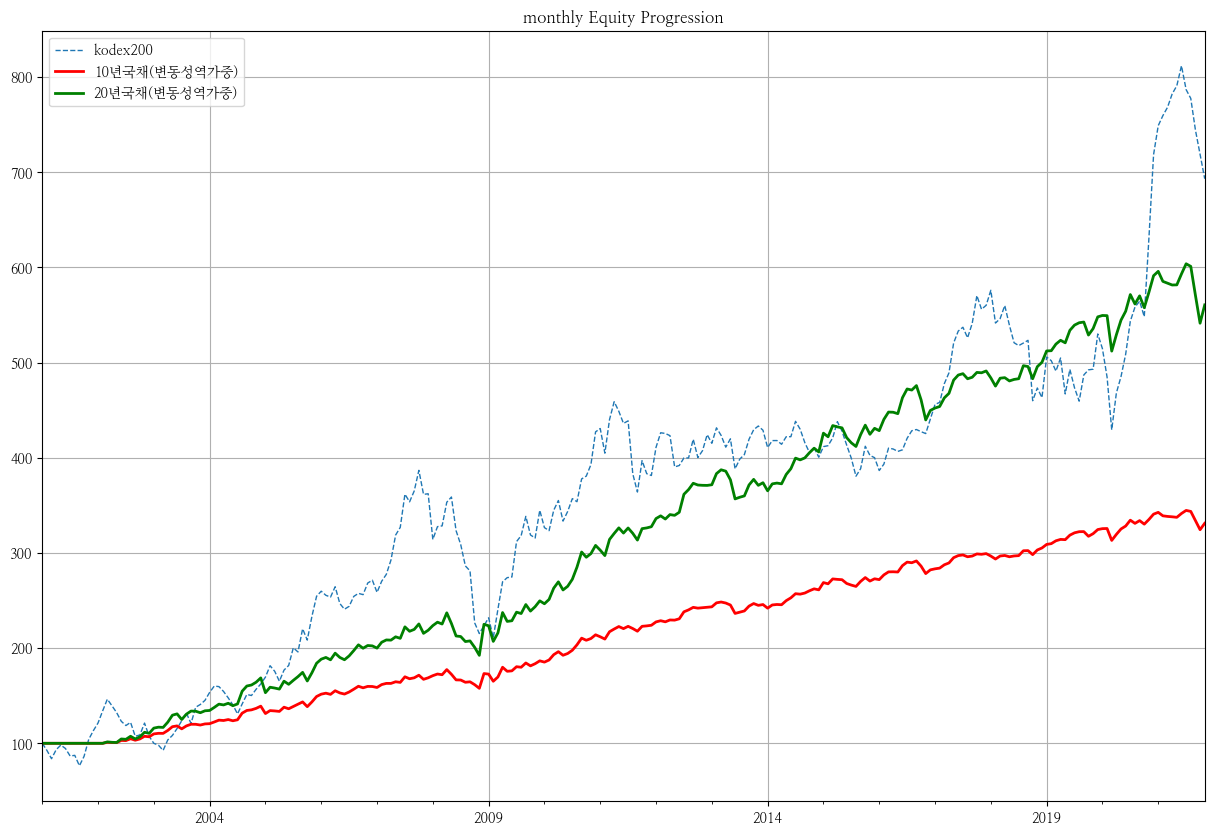

In [14]:
ax1 = r20_assets.plot(freq='M', ls='--', figsize=(15,10));
r10.plot(ax=ax1, freq='M', color='red', lw=2, figsize=(15, 10));
r20.plot(ax=ax1, freq='M', color='green', lw=2, figsize=(15, 10));

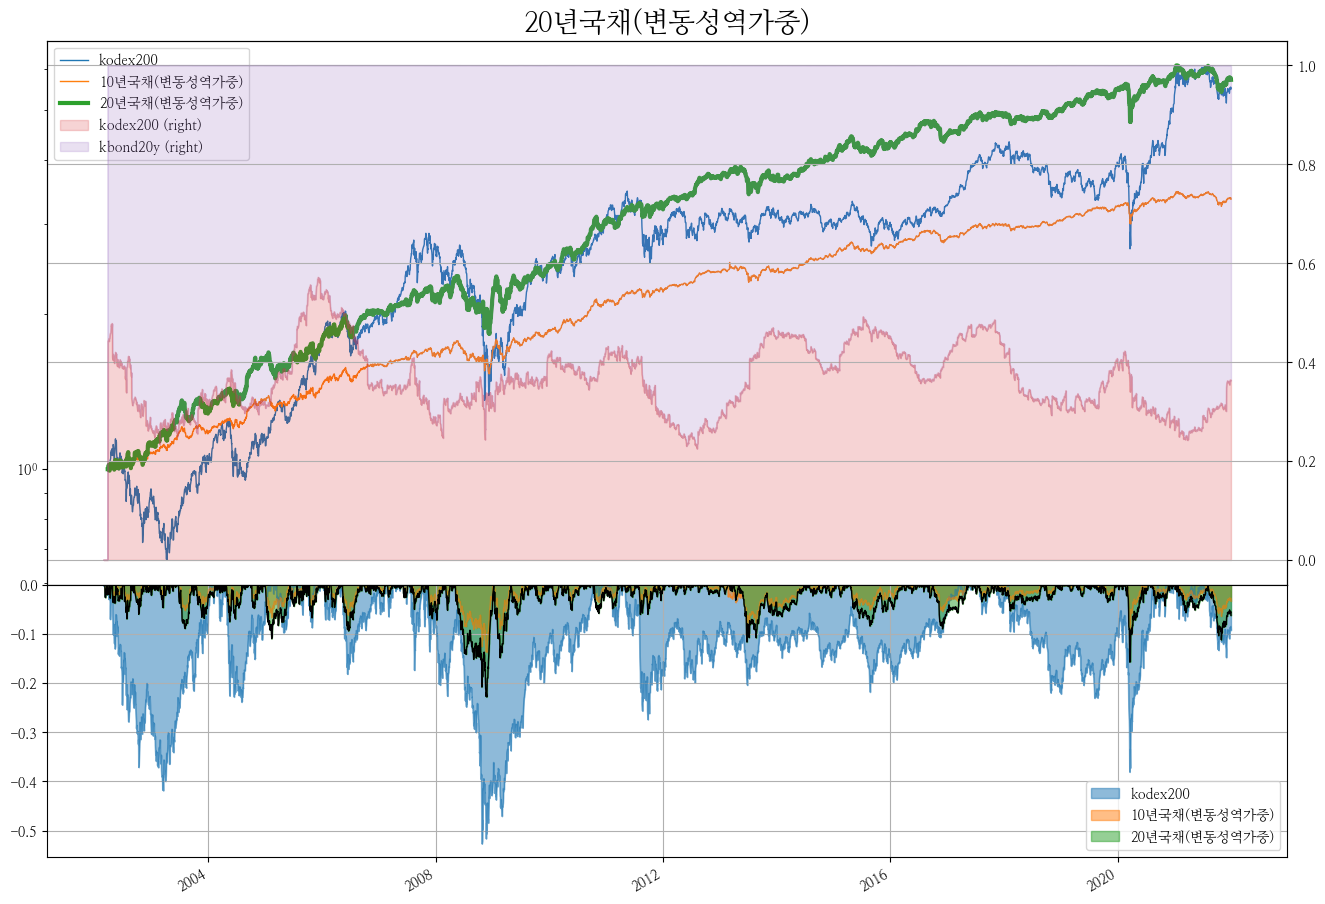

In [15]:
plot_assets(r_all, '2002-2', '2021', '20년국채(변동성역가중)')

In [16]:
r_all.prices[:'2017-6'].calc_stats().display()

Stat                 kodex200    10년국채(변동성역가중)    20년국채(변동성역가중)
-------------------  ----------  ------------------------  ------------------------
Start                2002-02-27  2002-02-27                2002-02-27
End                  2017-06-30  2017-06-30                2017-06-30
Risk-free rate       0.00%       0.00%                     0.00%

Total Return         296.31%     197.22%                   386.92%
Daily Sharpe         0.52        1.12                      1.03
Daily Sortino        0.82        1.86                      1.71
CAGR                 9.39%       7.36%                     10.87%
Max Drawdown         -52.67%     -13.72%                   -22.82%
Calmar Ratio         0.18        0.54                      0.48

MTD                  2.42%       0.74%                     1.11%
3m                   11.36%      3.30%                     5.27%
6m                   20.96%      5.31%                     8.27%
YTD                  20.96%      5.31%                    

## 변동성 역가중 구하기 연구

- bt 프레임워크에서 제공하는 bt.algos.WeighInvVol은 일간 기준
- 책과 같이 월간 기준으로 전략을 구현하려면(데이터는 일간 사용)

In [17]:
class WeighInvVol(bt.Algo):
    """ 변동성에 반비례한 비중 할당.
    
    1. 최근 12개월간의 주식과 채권의 월간 수익률을 매달 각 각 구합니다(총 12개).
    2. 앞서 구한 12개의 월별 수익률의 표준편차를 계산합니다. 이것이 주식과 채권의 평균 변동성입니다.
    """
    def __init__(self, lookback=12, lag=pd.DateOffset(days=0)):
        super(WeighInvVol, self).__init__()
        self.lookback = lookback
        self.lag = lag

    def __call__(self, target):
        selected = target.temp['selected']

        # 2. 월말 리밸런싱 : 전달 말일기준으로 계산
        t0 = (target.now - pd.DateOffset(months=1)).strftime("%Y-%m")
        start = (target.now -  pd.DateOffset(months=self.lookback+1)).strftime("%Y-%m")

        prc = target.universe[selected].loc[start:t0].resample('M').last()
        print(f"\nprc : {target.now} ==> {t0} ~ {start}")#\n{prc}\n")

        '''
        vol = np.divide(1.0, np.std(returns, ddof=1))
        vol[np.isinf(vol)] = np.NaN
        volsum = vol.sum()
        return np.divide(vol, volsum)
        '''
        tw = bt.ffn.calc_inv_vol_weights(prc.to_returns().dropna())
        target.temp["weights"] = tw.dropna()

        return True

In [18]:
변동성역가중M = bt.Strategy('변동성역가중M',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        WeighInvVol(lookback=12),
        bt.algos.PrintTempData(),
        bt.algos.Rebalance()

    ])

In [19]:
bt_invvol10_m = bt.Backtest(변동성역가중M, data[['kodex200', 'kbond10y']], name='10년국채(변동성역가중)_M', initial_capital=100000000)
bt_invvol20_m = bt.Backtest(변동성역가중M, data[['kodex200', 'kbond20y']], name='20년국채(변동성역가중)_M', initial_capital=100000000)

In [20]:
r10_m = bt.run(bt_invvol10_m)

2002-02-28 00:00:00

prc : 2002-02-28 00:00:00 ==> 2002-01 ~ 2001-01
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.234
kbond10y   0.766
dtype: float64}
2002-03-29 00:00:00

prc : 2002-03-29 00:00:00 ==> 2002-02 ~ 2001-02
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.236
kbond10y   0.764
dtype: float64}
2002-04-30 00:00:00

prc : 2002-04-30 00:00:00 ==> 2002-03 ~ 2001-03
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.241
kbond10y   0.759
dtype: float64}
2002-05-31 00:00:00

prc : 2002-05-31 00:00:00 ==> 2002-04 ~ 2001-04
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.229
kbond10y   0.771
dtype: float64}
2002-06-28 00:00:00

prc : 2002-06-28 00:00:00 ==> 2002-05 ~ 2001-05
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.208
kbond10y   0.792
dtype: float64}
2002-07-31 00:00:00

prc : 2002-07-31 00:00:00 ==> 2002-06 ~ 2001-06
{'selected': ['kodex200', 'kbond10y'], 'weights': kodex200   0.216
kbond10y   0.784
dt

In [21]:
r20_m = bt.run(bt_invvol20_m)

2002-02-28 00:00:00

prc : 2002-02-28 00:00:00 ==> 2002-01 ~ 2001-01
{'selected': ['kodex200', 'kbond20y'], 'weights': kodex200   0.383
kbond20y   0.617
dtype: float64}
2002-03-29 00:00:00

prc : 2002-03-29 00:00:00 ==> 2002-02 ~ 2001-02
{'selected': ['kodex200', 'kbond20y'], 'weights': kodex200   0.383
kbond20y   0.617
dtype: float64}
2002-04-30 00:00:00

prc : 2002-04-30 00:00:00 ==> 2002-03 ~ 2001-03
{'selected': ['kodex200', 'kbond20y'], 'weights': kodex200   0.388
kbond20y   0.612
dtype: float64}
2002-05-31 00:00:00

prc : 2002-05-31 00:00:00 ==> 2002-04 ~ 2001-04
{'selected': ['kodex200', 'kbond20y'], 'weights': kodex200   0.373
kbond20y   0.627
dtype: float64}
2002-06-28 00:00:00

prc : 2002-06-28 00:00:00 ==> 2002-05 ~ 2001-05
{'selected': ['kodex200', 'kbond20y'], 'weights': kodex200   0.345
kbond20y   0.655
dtype: float64}
2002-07-31 00:00:00

prc : 2002-07-31 00:00:00 ==> 2002-06 ~ 2001-06
{'selected': ['kodex200', 'kbond20y'], 'weights': kodex200   0.355
kbond20y   0.645
dt

In [22]:
r_all_m = bt.run(bt_kodex200, bt_invvol10_m, bt_invvol20_m, bt_invvol10, bt_invvol20)

In [23]:
r_all_m.set_date_range(start)
r_all_m.display()

Stat                 kodex200    10년국채(변동성역가중)_M    20년국채(변동성역가중)_M    10년국채(변동성역가중)    20년국채(변동성역가중)
-------------------  ----------  --------------------------  --------------------------  ------------------------  ------------------------
Start                2002-02-27  2002-02-27                  2002-02-27                  2002-02-27                2002-02-27
End                  2021-12-30  2021-12-30                  2021-12-30                  2021-12-30                2021-12-30
Risk-free rate       0.00%       0.00%                       0.00%                       0.00%                     0.00%

Total Return         448.85%     270.01%                     542.55%                     235.02%                   471.74%
Daily Sharpe         0.51        1.07                        0.97                        1.03                      0.93
Daily Sortino        0.81        1.76                        1.59                        1.68                      1.51
CAGR                 

In [24]:
r_all_m.prices.resample('M').last().to_drawdown_series().describe()

,kodex200,10년국채(변동성역가중)_M,20년국채(변동성역가중)_M,10년국채(변동성역가중),20년국채(변동성역가중)
count,239.000,239.000,239.000,239.000,239.000
mean,-0.100,-0.010,-0.018,-0.010,-0.018
std,0.093,0.017,0.030,0.017,0.029
min,-0.455,-0.121,-0.200,-0.111,-0.188
25%,-0.146,-0.012,-0.025,-0.012,-0.024
50%,-0.085,-0.001,-0.005,-0.002,-0.005
75%,-0.024,0.000,0.000,0.000,0.000
max,0.000,0.000,0.000,0.000,0.000


In [25]:
r_all_m.prices[:'2017-6'].calc_stats().display()

Stat                 kodex200    10년국채(변동성역가중)_M    20년국채(변동성역가중)_M    10년국채(변동성역가중)    20년국채(변동성역가중)
-------------------  ----------  --------------------------  --------------------------  ------------------------  ------------------------
Start                2002-02-27  2002-02-27                  2002-02-27                  2002-02-27                2002-02-27
End                  2017-06-30  2017-06-30                  2017-06-30                  2017-06-30                2017-06-30
Risk-free rate       0.00%       0.00%                       0.00%                       0.00%                     0.00%

Total Return         296.31%     223.28%                     437.26%                     197.22%                   386.92%
Daily Sharpe         0.52        1.16                        1.07                        1.12                      1.03
Daily Sortino        0.82        1.93                        1.78                        1.86                      1.71
CAGR                 

In [26]:
r_all_m.prices[:'2017-6'].resample('M').last().to_drawdown_series().describe()

,kodex200,10년국채(변동성역가중)_M,20년국채(변동성역가중)_M,10년국채(변동성역가중),20년국채(변동성역가중)
count,185.000,185.000,185.000,185.000,185.000
mean,-0.104,-0.010,-0.018,-0.010,-0.019
std,0.098,0.019,0.032,0.018,0.031
min,-0.455,-0.121,-0.200,-0.111,-0.188
25%,-0.149,-0.013,-0.026,-0.012,-0.027
50%,-0.085,-0.001,-0.004,-0.002,-0.004
75%,-0.026,0.000,0.000,0.000,0.000
max,0.000,0.000,0.000,0.000,0.000


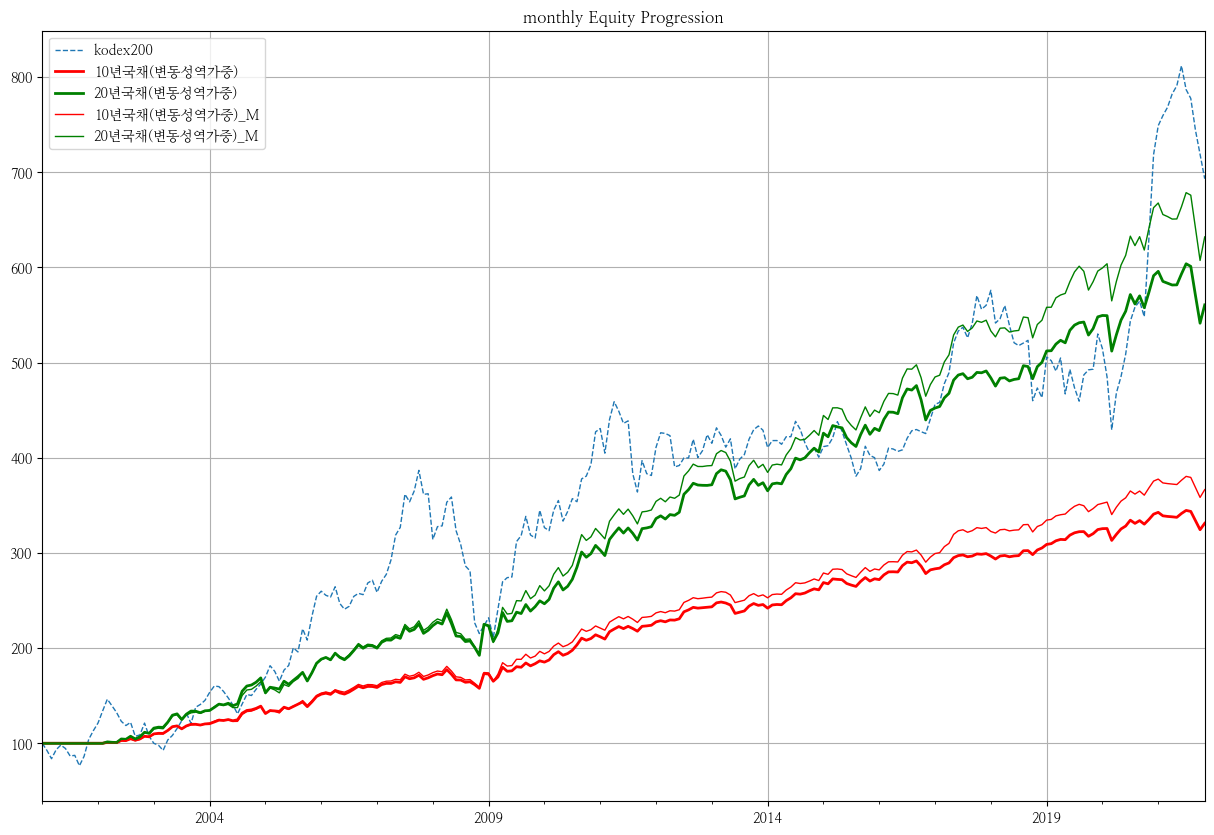

In [27]:
ax1 = r20_assets.plot(freq='M', ls='--', figsize=(15,10));
r10.plot(ax=ax1, freq='M', color='red', lw=2, figsize=(15, 10));
r20.plot(ax=ax1, freq='M', color='green', lw=2, figsize=(15, 10));
r10_m.plot(ax=ax1, freq='M', ls='-', color='red', lw=1, figsize=(15, 10));
r20_m.plot(ax=ax1, freq='M', ls='-', color='green', lw=1, figsize=(15, 10));

In [28]:
주식채권혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)
bt_test10 = bt.Backtest(주식채권혼합전략, data[['kodex200', 'kbond10y']], name='10년국채(동일비중))', initial_capital=100000000)
bt_test20 = bt.Backtest(주식채권혼합전략, data[['kodex200', 'kbond20y']], name='20년국채(동일비중)', initial_capital=100000000)

In [29]:
r10_ew = bt.run(bt_test10)

2002-02-28 00:00:00
2002-03-29 00:00:00
2002-04-30 00:00:00
2002-05-31 00:00:00
2002-06-28 00:00:00
2002-07-31 00:00:00
2002-08-30 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-29 00:00:00
2002-12-30 00:00:00
2003-01-30 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-30 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-30 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-31 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00
2004-12-30 00:00:00
2005-01-31 00:00:00
2005-02-28 00:00:00
2005-03-31 00:00:00
2005-04-29 00:00:00
2005-05-31 00:00:00
2005-06-30 00:00:00
2005-07-29 00:00:00
2005-08-31 00:00:00
2005-09-30 00:00:00
2005-10-31 00:00:00
2005-11-30 00:00:00
2005-12-29 00:00:00
2006-01-31 00:00:00
2006-02-28 00:00:00
2006-03-31 00:00:00


In [30]:
r20_ew = bt.run(bt_test20)

2002-02-28 00:00:00
2002-03-29 00:00:00
2002-04-30 00:00:00
2002-05-31 00:00:00
2002-06-28 00:00:00
2002-07-31 00:00:00
2002-08-30 00:00:00
2002-09-30 00:00:00
2002-10-31 00:00:00
2002-11-29 00:00:00
2002-12-30 00:00:00
2003-01-30 00:00:00
2003-02-28 00:00:00
2003-03-31 00:00:00
2003-04-30 00:00:00
2003-05-30 00:00:00
2003-06-30 00:00:00
2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-30 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-31 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00
2004-12-30 00:00:00
2005-01-31 00:00:00
2005-02-28 00:00:00
2005-03-31 00:00:00
2005-04-29 00:00:00
2005-05-31 00:00:00
2005-06-30 00:00:00
2005-07-29 00:00:00
2005-08-31 00:00:00
2005-09-30 00:00:00
2005-10-31 00:00:00
2005-11-30 00:00:00
2005-12-29 00:00:00
2006-01-31 00:00:00
2006-02-28 00:00:00
2006-03-31 00:00:00


In [31]:
r00 = bt.run(bt_kodex200, bt_invvol10_m, bt_invvol20_m, bt_invvol10, bt_invvol20, bt_test10, bt_test20)

In [32]:
r00.set_date_range(start)
r00.display()

Stat                 kodex200    10년국채(변동성역가중)_M    20년국채(변동성역가중)_M    10년국채(변동성역가중)    20년국채(변동성역가중)    10년국채(동일비중))    20년국채(동일비중)
-------------------  ----------  --------------------------  --------------------------  ------------------------  ------------------------  ---------------------  --------------------
Start                2002-02-27  2002-02-27                  2002-02-27                  2002-02-27                2002-02-27                2002-02-27             2002-02-27
End                  2021-12-30  2021-12-30                  2021-12-30                  2021-12-30                2021-12-30                2021-12-30             2021-12-30
Risk-free rate       0.00%       0.00%                       0.00%                       0.00%                     0.00%                     0.00%                  0.00%

Total Return         448.85%     270.01%                     542.55%                     235.02%                   471.74%                   325.88%             

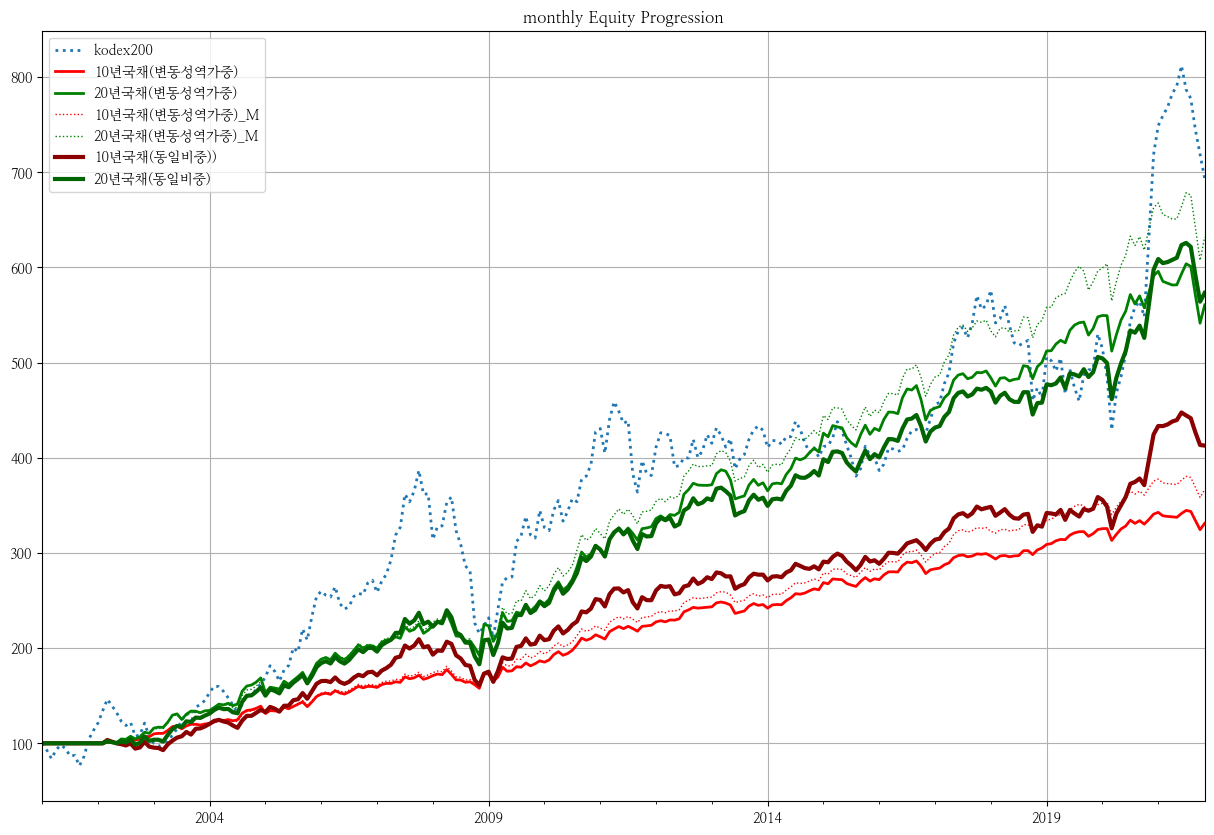

In [33]:
ax1 = r20_assets.plot(freq='M', ls=':', lw=2, figsize=(15,10));
r10.plot(ax=ax1, freq='M', color='red', lw=2, figsize=(15, 10));
r20.plot(ax=ax1, freq='M', color='green', lw=2, figsize=(15, 10));
r10_m.plot(ax=ax1, freq='M', ls=':', color='red', lw=1, figsize=(15, 10));
r20_m.plot(ax=ax1, freq='M', ls=':', color='green', lw=1, figsize=(15, 10));
r10_ew.plot(ax=ax1, freq='M', ls='-', color='darkred', lw=3, figsize=(15, 10));
r20_ew.plot(ax=ax1, freq='M', ls='-', color='darkgreen', lw=3, figsize=(15, 10));